<a href="https://colab.research.google.com/github/zehor-l/Generating-NFTs-with-GANs/blob/main/Generating_NFTs_with_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Purpose of the Project:
Ever since I was a kid, Final Fantasy has been my all-time favorite game. The magic, the epic battles, and the beautiful, otherworldly landscapes have always captured my imagination. I’ve always been obsessed with the art style, and now, thanks to AI, we have a chance to create our very own Final Fantasy-inspired NFTs! Using Generative Adversarial Networks (GANs) and CLIP, we’ll bring the essence of Final Fantasy into a digital art piece, just like training a creative AI artist to paint a masterpiece from my dreams.

Let me take you through this journey to create a one-of-a-kind NFT in the style of Final Fantasy!

## Set Up Our Tools
Just like the characters in Final Fantasy gather their weapons, we need to gather our tools for the adventure ahead! First, let’s install and import everything we need to start generating our art.

In [1]:
# Install the BigSleep library for GAN-based image generation
!pip install big-sleep --upgrade

# Import the necessary libraries
from tqdm.notebook import trange  # For progress tracking
from IPython.display import Image, display  # For displaying images
from big_sleep import Imagine  # BigSleep's image generation class




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 3.9 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=6ef506918c9634ece052f210b423f19752fa5fba033cbb5b58dbc9c026e1ba7b
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


AssertionError: CUDA must be available in order to use Big Sleep

## Define the Text Prompt
Next, we define the text prompt that describes what kind of Final Fantasy NFT we want to generate. It’s like telling the AI, "Hey, draw me a cool fantasy warrior!"

In [ ]:
# Define the text prompt to generate a Final Fantasy NFT
TEXT = 'Epic Final Fantasy warrior with a sword in a magical land'




## Set Generation Parameters
We define parameters like how often the AI should save progress, the learning rate, and the number of iterations. This ensures that our model generates images efficiently

In [ ]:
# Set up parameters for the generation
SAVE_EVERY = 100  # Save progress every 100 iterations
SAVE_PROGRESS = True  # Save intermediate images
LEARNING_RATE = 5e-2  # Learning rate for training
ITERATIONS = 1000  # Number of iterations
SEED = 0  # Seed for reproducibility


## Create the Image Generator
Now, we initialize the image generator using the `Imagine` class, which combines GANs and CLIP to create art from our prompt.

In [ ]:
# Initialize the Imagine class with our text prompt and parameters
model = Imagine(
    text = TEXT,
    save_every = SAVE_EVERY,
    lr = LEARNING_RATE,
    iterations = ITERATIONS,
    save_progress = SAVE_PROGRESS,
    seed = SEED
)


setting seed of 0
you can override this with --seed argument in the command line, or --random for a randomly chosen one


/usr/local/lib/python3.10/dist-packages/big_sleep/biggan.py:562: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(resolved_model_file, map_location='cpu

## Train the Model and Generate Images
This is where the magic happens! We start training the model, and after each iteration, it generates a new image that’s closer to our desired Final Fantasy warrior.

epochs:   0%|          | 0/20 [00:00<?, ?it/s]

iteration:   0%|          | 0/1000 [00:00<?, ?it/s]

image updated at "./Epic_Final_Fantasy_warrior_with_a_sword_in_a_magical_land.png"


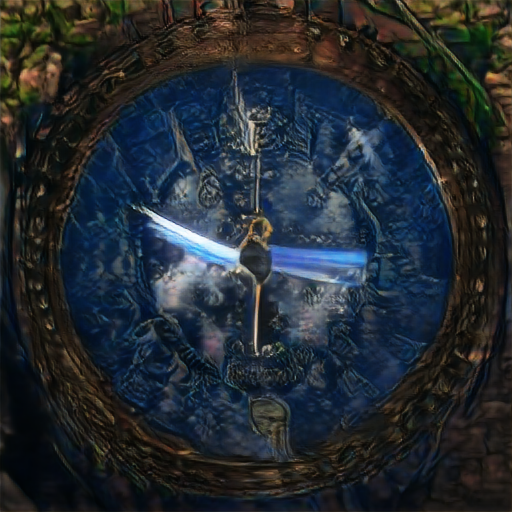

image updated at "./Epic_Final_Fantasy_warrior_with_a_sword_in_a_magical_land.png"


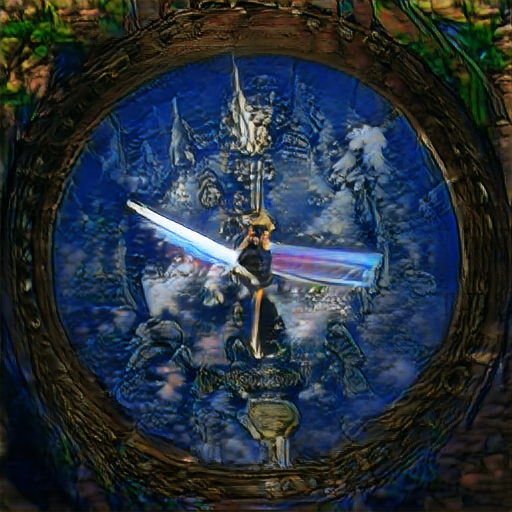

image updated at "./Epic_Final_Fantasy_warrior_with_a_sword_in_a_magical_land.png"


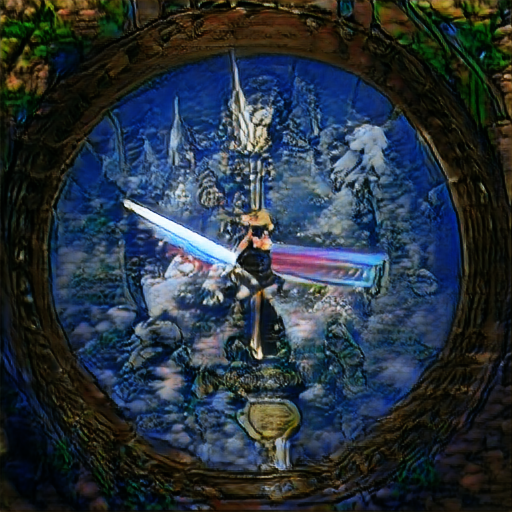

image updated at "./Epic_Final_Fantasy_warrior_with_a_sword_in_a_magical_land.png"


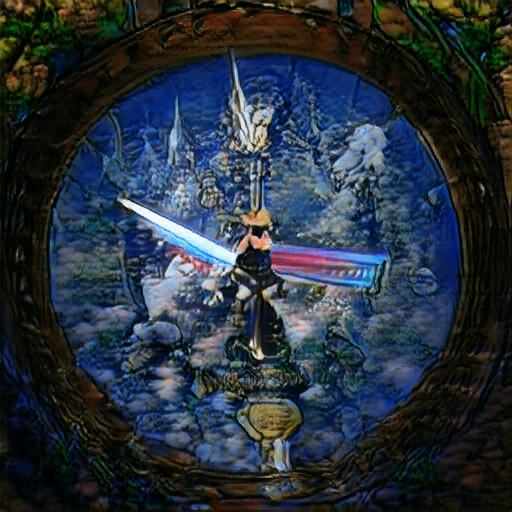

In [ ]:
# Start the training process and generate images
for epoch in trange(20, desc='epochs'):
    for i in trange(1000, desc='iteration'):
        model.train_step(epoch, i)  # Train the model step by step
        if i == 0 or i % model.save_every != 0:
            continue
        # Save and display the generated image
        filename = TEXT.replace(' ', '_')
        image = Image(f'./{filename}.png')
        display(image)




## Generate a GIF of the Artwork
For some extra fun, we can combine the generated images into a GIF to visualize how the artwork evolved over time.

In [ ]:
# Import necessary libraries
import glob
from PIL import Image

# Create a GIF from the saved images
name = "_".join(TEXT.lower().split(" "))
fp_in = f"/path/to/{name}_*.png"
fp_out = f"/path/to/{name}.gif"

# Save the GIF
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=200, loop=0)




setting seed of 0
you can override this with --seed argument in the command line, or --random for a randomly chosen one


epochs:   0%|          | 0/10 [00:00<?, ?it/s]

iteration:   0%|          | 0/300 [00:00<?, ?it/s]

image updated at "./A_graceful_young_woman_with_long_blonde_hair_in_an_elegant_white_gown_holding_a_glowing_staff_standing_by_the_ocean_at_sunset._She_has_a_calm_regal_presence_with_blue_eyes_and_a_determined_expression_inspired_by_Luna_from_Final_Fantasy_XV..png"


AttributeError: 'Imagine' object has no attribute 'save'